# FINAL PROJECT

### Submitted By: Dolsy Arora

### Predicting : Sentiment Analysis   

#### Review data of Cosmetics & Beauty products of top brands at https://www.nykaa.com/

#### Data scraped from top brands such as Olay, Nivea, NYX Professional Makeup, Maybelline New York, Lakme, L'Oreal Paris etc.

#### Reviews were collected from unique 295 SKU or product ids from the following product dataset



In [3]:
# importing libraries
import pandas as pd
import re
# fitting the warnings to ignore
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 100)

In [4]:
# loading the data 
data = pd.read_csv("reviews.csv", encoding= 'unicode_escape')

In [5]:
# priting the data
data

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference from the first day. Use it with Olay cleanser for b...,Ashton Dsouza,23-01-2021 15:17,5,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous Whip Day Cream (non SPF),1999,1599,4.1,43
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoothens ur skin n makes it soft . I liked it,Amrit Neelam,07-09-2020 15:30,5,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous Whip Day Cream (non SPF),1999,1599,4.1,43
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now.. it is perfect for combination n oily skin as it ...,Sanchi Gupta,13-11-2020 12:24,4,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous Whip Day Cream (non SPF),1999,1599,4.1,43
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a great base or primer as it smoothens the skin but...",Ruchi Shah,14-06-2020 11:56,3,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous Whip Day Cream (non SPF),1999,1599,4.1,43
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for other products,Sukanya Sarkar,22-12-2020 15:24,2,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous Whip Day Cream (non SPF),1999,1599,4.1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,452449,Herbal Essences,4848324,Amazing conditioner,Great conditioner. Very nice smell. Makes hair silky and smooth. Hair feels soft and silky. Grea...,beauty blog,19-04-2019 08:53,5,False,False,NaN,Herbal Essences Bio:Renew Hydrate Coconut Milk Conditioner,650,423,4.4,1117
5854,452449,Herbal Essences,11043241,Awesome Product,I just received it today and use it trust me it's wonderful. I have chemically treated hair and ...,Priya Khan,24-10-2019 14:40,5,False,False,NaN,Herbal Essences Bio:Renew Hydrate Coconut Milk Conditioner,650,423,4.4,1117
5855,452449,Herbal Essences,11538090,Aroma,The aroma is really amazing and my hair are feeling so soft and the frizz has almost gone.,Srishti Arora,30-11-2019 18:22,5,False,False,NaN,Herbal Essences Bio:Renew Hydrate Coconut Milk Conditioner,650,423,4.4,1117
5856,452449,Herbal Essences,12980130,Dandruff,Used the shampoo severe hairfall with dandruff,adumulla shruti,18-03-2020 10:11,2,True,False,Verified Buyer,Herbal Essences Bio:Renew Hydrate Coconut Milk Conditioner,650,423,4.4,1117


In [6]:
# converting it into a DataFrame
df = pd.DataFrame(data)

In [7]:
# selecting the needed features(column name) for the analysis
df = df.loc[0: ,['brand_name', 'review_title', 'review_text']]
df

,brand_name,review_title,review_text
0,Olay,Worth buying 50g one,Works as it claims. Could see the difference from the first day. Use it with Olay cleanser for b...
1,Olay,Best cream to start ur day,It does what it claims . Best thing is it smoothens ur skin n makes it soft . I liked it
2,Olay,perfect for summers dry for winters,I have been using this product for months now.. it is perfect for combination n oily skin as it ...
3,Olay,Not a moisturizer,"i have an oily skin, while this whip acts as a great base or primer as it smoothens the skin but..."
4,Olay,Average,It's not that good. Please refresh try for other products
...,...,...,...
5853,Herbal Essences,Amazing conditioner,Great conditioner. Very nice smell. Makes hair silky and smooth. Hair feels soft and silky. Grea...
5854,Herbal Essences,Awesome Product,I just received it today and use it trust me it's wonderful. I have chemically treated hair and ...
5855,Herbal Essences,Aroma,The aroma is really amazing and my hair are feeling so soft and the frizz has almost gone.
5856,Herbal Essences,Dandruff,Used the shampoo severe hairfall with dandruff


In [8]:
# printing the data types of the features
df.dtypes

brand_name      object
review_title    object
review_text     object
dtype: object

#### we are ok to go further 
#### we are ok with the data type's

In [9]:
# combining  the string review_text and review_title into one column("review")
df["review"] = df["review_title"] +"-"+ df['review_text'].astype(str) 
df

,brand_name,review_title,review_text,review
0,Olay,Worth buying 50g one,Works as it claims. Could see the difference from the first day. Use it with Olay cleanser for b...,Worth buying 50g one-Works as it claims. Could see the difference from the first day. Use it wit...
1,Olay,Best cream to start ur day,It does what it claims . Best thing is it smoothens ur skin n makes it soft . I liked it,Best cream to start ur day-It does what it claims . Best thing is it smoothens ur skin n makes i...
2,Olay,perfect for summers dry for winters,I have been using this product for months now.. it is perfect for combination n oily skin as it ...,perfect for summers dry for winters-I have been using this product for months now.. it is perfec...
3,Olay,Not a moisturizer,"i have an oily skin, while this whip acts as a great base or primer as it smoothens the skin but...","Not a moisturizer-i have an oily skin, while this whip acts as a great base or primer as it smoo..."
4,Olay,Average,It's not that good. Please refresh try for other products,Average-It's not that good. Please refresh try for other products
...,...,...,...,...
5853,Herbal Essences,Amazing conditioner,Great conditioner. Very nice smell. Makes hair silky and smooth. Hair feels soft and silky. Grea...,Amazing conditioner-Great conditioner. Very nice smell. Makes hair silky and smooth. Hair feels ...
5854,Herbal Essences,Awesome Product,I just received it today and use it trust me it's wonderful. I have chemically treated hair and ...,Awesome Product-I just received it today and use it trust me it's wonderful. I have chemically t...
5855,Herbal Essences,Aroma,The aroma is really amazing and my hair are feeling so soft and the frizz has almost gone.,Aroma-The aroma is really amazing and my hair are feeling so soft and the frizz has almost gone.
5856,Herbal Essences,Dandruff,Used the shampoo severe hairfall with dandruff,Dandruff-Used the shampoo severe hairfall with dandruff


In [10]:
# printing the final Data Frame ("brand_name" & "review")
df = df.loc[0: ,['brand_name',  'review']]
df

,brand_name,review
0,Olay,Worth buying 50g one-Works as it claims. Could see the difference from the first day. Use it wit...
1,Olay,Best cream to start ur day-It does what it claims . Best thing is it smoothens ur skin n makes i...
2,Olay,perfect for summers dry for winters-I have been using this product for months now.. it is perfec...
3,Olay,"Not a moisturizer-i have an oily skin, while this whip acts as a great base or primer as it smoo..."
4,Olay,Average-It's not that good. Please refresh try for other products
...,...,...
5853,Herbal Essences,Amazing conditioner-Great conditioner. Very nice smell. Makes hair silky and smooth. Hair feels ...
5854,Herbal Essences,Awesome Product-I just received it today and use it trust me it's wonderful. I have chemically t...
5855,Herbal Essences,Aroma-The aroma is really amazing and my hair are feeling so soft and the frizz has almost gone.
5856,Herbal Essences,Dandruff-Used the shampoo severe hairfall with dandruff


In [11]:
# printing the info of the Data Frame
df.info

<bound method DataFrame.info of            brand_name  \
0                Olay   
1                Olay   
2                Olay   
3                Olay   
4                Olay   
...               ...   
5853  Herbal Essences   
5854  Herbal Essences   
5855  Herbal Essences   
5856  Herbal Essences   
5857         Colorbar   

                                                                                                   review  
0     Worth buying 50g one-Works as it claims. Could see the difference from the first day. Use it wit...  
1     Best cream to start ur day-It does what it claims . Best thing is it smoothens ur skin n makes i...  
2     perfect for summers dry for winters-I have been using this product for months now.. it is perfec...  
3     Not a moisturizer-i have an oily skin, while this whip acts as a great base or primer as it smoo...  
4                                       Average-It's not that good. Please refresh try for other products  
...                

## Formatting

In [12]:
# importing the string library 
import string
# printing the punctuations from the string library
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
# imporitng library 
import nltk
# cleaning the review data from the unnneded 
# punctuations, stopwords, and emoji's

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()


wn = nltk.WordNetLemmatizer()

In [14]:
# defining the function of text cleaning
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation]) # remove puncuations
    tokens = re.split('\W+', text) # tokenezie 
    emoj = re.sub(r"[^a-zA-Z0-9]", " ", text)
    text = [word for word in tokens if word not in stopwords] # remove stop words
    return text



In [15]:
# printing the new cleaned review text
df['review_clean'] = df['review'].apply(lambda x: clean_text(x.lower())) # use the lambda function to apply to the dataset

df.head() # first 5 rows 


,brand_name,review,review_clean
0,Olay,Worth buying 50g one-Works as it claims. Could see the difference from the first day. Use it wit...,"[worth, buying, 50g, oneworks, claims, could, see, difference, first, day, use, olay, cleanser, ..."
1,Olay,Best cream to start ur day-It does what it claims . Best thing is it smoothens ur skin n makes i...,"[best, cream, start, ur, dayit, claims, best, thing, smoothens, ur, skin, n, makes, soft, liked]"
2,Olay,perfect for summers dry for winters-I have been using this product for months now.. it is perfec...,"[perfect, summers, dry, wintersi, using, product, months, perfect, combination, n, oily, skin, n..."
3,Olay,"Not a moisturizer-i have an oily skin, while this whip acts as a great base or primer as it smoo...","[moisturizeri, oily, skin, whip, acts, great, base, primer, smoothens, skin, moisturise, skin, s..."
4,Olay,Average-It's not that good. Please refresh try for other products,"[averageits, good, please, refresh, try, products]"


In [16]:
# defining the function of stemming
# and prinitng the stemmed text("review_clean_stemmed")
def stemming(tokenized_text):
    text =[ps.stem(word) for word in tokenized_text]
    return text

df['review_clean_stemmed'] = df['review_clean'].apply(lambda x: stemming(x))

df.head()


,brand_name,review,review_clean,review_clean_stemmed
0,Olay,Worth buying 50g one-Works as it claims. Could see the difference from the first day. Use it wit...,"[worth, buying, 50g, oneworks, claims, could, see, difference, first, day, use, olay, cleanser, ...","[worth, buy, 50g, onework, claim, could, see, differ, first, day, use, olay, cleanser, best, res..."
1,Olay,Best cream to start ur day-It does what it claims . Best thing is it smoothens ur skin n makes i...,"[best, cream, start, ur, dayit, claims, best, thing, smoothens, ur, skin, n, makes, soft, liked]","[best, cream, start, ur, dayit, claim, best, thing, smoothen, ur, skin, n, make, soft, like]"
2,Olay,perfect for summers dry for winters-I have been using this product for months now.. it is perfec...,"[perfect, summers, dry, wintersi, using, product, months, perfect, combination, n, oily, skin, n...","[perfect, summer, dri, wintersi, use, product, month, perfect, combin, n, oili, skin, non, greas..."
3,Olay,"Not a moisturizer-i have an oily skin, while this whip acts as a great base or primer as it smoo...","[moisturizeri, oily, skin, whip, acts, great, base, primer, smoothens, skin, moisturise, skin, s...","[moisturizeri, oili, skin, whip, act, great, base, primer, smoothen, skin, moisturis, skin, skin..."
4,Olay,Average-It's not that good. Please refresh try for other products,"[averageits, good, please, refresh, try, products]","[averageit, good, pleas, refresh, tri, product]"


In [17]:
# definig the function of lemmatized and printing the lemmatized column ("review_clean_lemmatized")
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['review_clean_lemmatized'] = df['review_clean'].apply(lambda x: lemmatizing(x))

df.head(10)

,brand_name,review,review_clean,review_clean_stemmed,review_clean_lemmatized
0,Olay,Worth buying 50g one-Works as it claims. Could see the difference from the first day. Use it wit...,"[worth, buying, 50g, oneworks, claims, could, see, difference, first, day, use, olay, cleanser, ...","[worth, buy, 50g, onework, claim, could, see, differ, first, day, use, olay, cleanser, best, res...","[worth, buying, 50g, oneworks, claim, could, see, difference, first, day, use, olay, cleanser, b..."
1,Olay,Best cream to start ur day-It does what it claims . Best thing is it smoothens ur skin n makes i...,"[best, cream, start, ur, dayit, claims, best, thing, smoothens, ur, skin, n, makes, soft, liked]","[best, cream, start, ur, dayit, claim, best, thing, smoothen, ur, skin, n, make, soft, like]","[best, cream, start, ur, dayit, claim, best, thing, smoothens, ur, skin, n, make, soft, liked]"
2,Olay,perfect for summers dry for winters-I have been using this product for months now.. it is perfec...,"[perfect, summers, dry, wintersi, using, product, months, perfect, combination, n, oily, skin, n...","[perfect, summer, dri, wintersi, use, product, month, perfect, combin, n, oili, skin, non, greas...","[perfect, summer, dry, wintersi, using, product, month, perfect, combination, n, oily, skin, non..."
3,Olay,"Not a moisturizer-i have an oily skin, while this whip acts as a great base or primer as it smoo...","[moisturizeri, oily, skin, whip, acts, great, base, primer, smoothens, skin, moisturise, skin, s...","[moisturizeri, oili, skin, whip, act, great, base, primer, smoothen, skin, moisturis, skin, skin...","[moisturizeri, oily, skin, whip, act, great, base, primer, smoothens, skin, moisturise, skin, sk..."
4,Olay,Average-It's not that good. Please refresh try for other products,"[averageits, good, please, refresh, try, products]","[averageit, good, pleas, refresh, tri, product]","[averageits, good, please, refresh, try, product]"
5,Olay,not good for oily skin-dz product z best for dry skin ...one of olay representative ...suggest m...,"[good, oily, skindz, product, z, best, dry, skin, one, olay, representative, suggest, buy, dzshe...","[good, oili, skindz, product, z, best, dri, skin, one, olay, repres, suggest, buy, dzshe, said, ...","[good, oily, skindz, product, z, best, dry, skin, one, olay, representative, suggest, buy, dzshe..."
6,Olay,"All time favorite-This cream is just awesome, It makes my rough skin soft and smooth without lea...","[time, favoritethis, cream, awesome, makes, rough, skin, soft, smooth, without, leaving, oily, e...","[time, favoritethi, cream, awesom, make, rough, skin, soft, smooth, without, leav, oili, effect,...","[time, favoritethis, cream, awesome, make, rough, skin, soft, smooth, without, leaving, oily, ef..."
7,Olay,"""Good Product ""-Instantly perfect skin tone appearance.","[good, product, instantly, perfect, skin, tone, appearance]","[good, product, instantli, perfect, skin, tone, appear]","[good, product, instantly, perfect, skin, tone, appearance]"
8,Olay,Good eye cream combo-This eye cream combo is effective. Works on fine lines and under eye dark c...,"[good, eye, cream, combothis, eye, cream, combo, effective, works, fine, lines, eye, dark, circl...","[good, eye, cream, combothi, eye, cream, combo, effect, work, fine, line, eye, dark, circl, wort...","[good, eye, cream, combothis, eye, cream, combo, effective, work, fine, line, eye, dark, circle,..."
9,Olay,"""Olay''-3in1 benifits, helps reduces dark spots and wrinkles.","[olay3in1, benifits, helps, reduces, dark, spots, wrinkles]","[olay3in1, benifit, help, reduc, dark, spot, wrinkl]","[olay3in1, benifits, help, reduces, dark, spot, wrinkle]"


In [18]:
# importing the tf idf library
from sklearn.feature_extraction.text import TfidfVectorizer
# printing the tf idf's for lemmatized text
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df['review_clean_lemmatized'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5858, 5831)
['01ivorythis2ndpurchaseproducttilldatehaventfoundcompactlikesimatyifyingsoftlovetexturegoodoilyskinbeautyusedseteyestay78hrsloveloveloveï½', '01notoriousredamazing', '02chaoticcalypsoitsdarkbluecolourmostlylooklikeblackcolour', '02chaoticcalypsolovedeepbluecolourlovecolorbarnailpolish', '02chaoticcalypsothecoloursaymidnightdarkblueloveï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½ï½givemattelookeyethanksoomuchnykaagirlco', '02naturalbuffniceoneblendevenlyskin', '02shadeitï½ï½ï½ï½ï½ï½ï½ï½ï½ssurprisingfoundationgotminitrycomfortablefinisheasyblenddoesnï½ï½ï½ï½ï½ï½ï½ï½ï½tox', '03deviousthenykaaminilipstickcuteshadereallyawsomegoingcollctwholecolorsure', '03enchantingforestdarkgreenbeautifulcolourextremelylonglastingdifficultcleancomparedeyeliner', '03enchantingforestitsgreatdarkgreenshadepigmentationgood2strokeclaimwaterresistantsmudgeproofstaygoodhourdonttouch', '03enchantingforestloveshadegivebeautifullookeye', '03enchantingforestthisquitedarksomeoneneedcomecloseidentifybl

In [19]:
# defining the function to check for punctuation after cleaning to recheck
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

count_punct("review_clean_lemmatized")


8.7

In [20]:
# printing the body length and the punctuation % 
df['body_len'] = df['review_clean_lemmatized'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['review_clean_lemmatized'].apply(lambda x: count_punct(x))
df

,brand_name,review,review_clean,review_clean_stemmed,review_clean_lemmatized,body_len,punct%
0,Olay,Worth buying 50g one-Works as it claims. Could see the difference from the first day. Use it wit...,"[worth, buying, 50g, oneworks, claims, could, see, difference, first, day, use, olay, cleanser, ...","[worth, buy, 50g, onework, claim, could, see, differ, first, day, use, olay, cleanser, best, res...","[worth, buying, 50g, oneworks, claim, could, see, difference, first, day, use, olay, cleanser, b...",15,0.0
1,Olay,Best cream to start ur day-It does what it claims . Best thing is it smoothens ur skin n makes i...,"[best, cream, start, ur, dayit, claims, best, thing, smoothens, ur, skin, n, makes, soft, liked]","[best, cream, start, ur, dayit, claim, best, thing, smoothen, ur, skin, n, make, soft, like]","[best, cream, start, ur, dayit, claim, best, thing, smoothens, ur, skin, n, make, soft, liked]",15,0.0
2,Olay,perfect for summers dry for winters-I have been using this product for months now.. it is perfec...,"[perfect, summers, dry, wintersi, using, product, months, perfect, combination, n, oily, skin, n...","[perfect, summer, dri, wintersi, use, product, month, perfect, combin, n, oili, skin, non, greas...","[perfect, summer, dry, wintersi, using, product, month, perfect, combination, n, oily, skin, non...",21,0.0
3,Olay,"Not a moisturizer-i have an oily skin, while this whip acts as a great base or primer as it smoo...","[moisturizeri, oily, skin, whip, acts, great, base, primer, smoothens, skin, moisturise, skin, s...","[moisturizeri, oili, skin, whip, act, great, base, primer, smoothen, skin, moisturis, skin, skin...","[moisturizeri, oily, skin, whip, act, great, base, primer, smoothens, skin, moisturise, skin, sk...",20,0.0
4,Olay,Average-It's not that good. Please refresh try for other products,"[averageits, good, please, refresh, try, products]","[averageit, good, pleas, refresh, tri, product]","[averageits, good, please, refresh, try, product]",6,0.0
...,...,...,...,...,...,...,...
5853,Herbal Essences,Amazing conditioner-Great conditioner. Very nice smell. Makes hair silky and smooth. Hair feels ...,"[amazing, conditionergreat, conditioner, nice, smell, makes, hair, silky, smooth, hair, feels, s...","[amaz, conditionergreat, condition, nice, smell, make, hair, silki, smooth, hair, feel, soft, si...","[amazing, conditionergreat, conditioner, nice, smell, make, hair, silky, smooth, hair, feel, sof...",17,0.0
5854,Herbal Essences,Awesome Product-I just received it today and use it trust me it's wonderful. I have chemically t...,"[awesome, producti, received, today, use, trust, wonderful, chemically, treated, hair, work, great]","[awesom, producti, receiv, today, use, trust, wonder, chemic, treat, hair, work, great]","[awesome, producti, received, today, use, trust, wonderful, chemically, treated, hair, work, great]",12,0.0
5855,Herbal Essences,Aroma-The aroma is really amazing and my hair are feeling so soft and the frizz has almost gone.,"[aromathe, aroma, really, amazing, hair, feeling, soft, frizz, almost, gone]","[aromath, aroma, realli, amaz, hair, feel, soft, frizz, almost, gone]","[aromathe, aroma, really, amazing, hair, feeling, soft, frizz, almost, gone]",10,0.0
5856,Herbal Essences,Dandruff-Used the shampoo severe hairfall with dandruff,"[dandruffused, shampoo, severe, hairfall, dandruff]","[dandruffus, shampoo, sever, hairfal, dandruff]","[dandruffused, shampoo, severe, hairfall, dandruff]",5,0.0


## data is free of punctuations 

In [21]:
# printing the n grams of the features
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(df["review"])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(5858, 42566)
['01 and', '01 get', '01 gives', '01 good', '01 highlighter', '01 it', '01 itï', '01 ivory', '01 just', '01 love', '01 must', '01 natural', '01 nice', '01 notorious', '01 oh', '01 so', '01 suits', '01 the', '01 this', '01 those', '01 used', '01 very', '01 weightless', '01 which', '01 winged', '02 04', '02 am', '02 and', '02 as', '02 basically', '02 beautifully', '02 best', '02 blends', '02 chaotic', '02 good', '02 got', '02 is', '02 it', '02 its', '02 little', '02 love', '02 my', '02 natural', '02 nude', '02 nyc', '02 perfect', '02 shade', '02 so', '02 thanks', '02 the', '02 this', '02 warm', '02 will', '03 awesome', '03 colour', '03 devious', '03 enchanting', '03 fair', '03 green', '03 is', '03 it', '03 must', '03 product', '03 suits', '03 this', '03 ve', '03 warm', '03 you', '04 07', '04 amazing', '04 cosy', '04 cozy', '04 is', '04 it', '04 loved', '04 may', '04 mystic', '04 nice', '04 nykaa', '04 shade', '04 super', '04 this', '04 warm', '04 woow', '05 best', '05 defin

In [22]:
# printing the feature("review_clean_lemmatized")
df["review_clean_lemmatized"]

0       [worth, buying, 50g, oneworks, claim, could, see, difference, first, day, use, olay, cleanser, b...
1            [best, cream, start, ur, dayit, claim, best, thing, smoothens, ur, skin, n, make, soft, liked]
2       [perfect, summer, dry, wintersi, using, product, month, perfect, combination, n, oily, skin, non...
3       [moisturizeri, oily, skin, whip, act, great, base, primer, smoothens, skin, moisturise, skin, sk...
4                                                         [averageits, good, please, refresh, try, product]
                                                       ...                                                 
5853    [amazing, conditionergreat, conditioner, nice, smell, make, hair, silky, smooth, hair, feel, sof...
5854    [awesome, producti, received, today, use, trust, wonderful, chemically, treated, hair, work, great]
5855                           [aromathe, aroma, really, amazing, hair, feeling, soft, frizz, almost, gone]
5856                        

In [23]:
# printing the unique brand names
df["brand_name"].unique()

array(['Olay', 'Nykaa Naturals', 'Nykaa Cosmetics', 'Nivea',
       'NYX Professional Makeup', 'Maybelline New York', 'Lakme',
       'Kay Beauty', 'Herbal Essences', 'Colorbar'], dtype=object)

In [24]:
# printing the data frame to check
df = df.loc[0: ,['brand_name', 'review','review_clean_lemmatized']]
df

,brand_name,review,review_clean_lemmatized
0,Olay,Worth buying 50g one-Works as it claims. Could see the difference from the first day. Use it wit...,"[worth, buying, 50g, oneworks, claim, could, see, difference, first, day, use, olay, cleanser, b..."
1,Olay,Best cream to start ur day-It does what it claims . Best thing is it smoothens ur skin n makes i...,"[best, cream, start, ur, dayit, claim, best, thing, smoothens, ur, skin, n, make, soft, liked]"
2,Olay,perfect for summers dry for winters-I have been using this product for months now.. it is perfec...,"[perfect, summer, dry, wintersi, using, product, month, perfect, combination, n, oily, skin, non..."
3,Olay,"Not a moisturizer-i have an oily skin, while this whip acts as a great base or primer as it smoo...","[moisturizeri, oily, skin, whip, act, great, base, primer, smoothens, skin, moisturise, skin, sk..."
4,Olay,Average-It's not that good. Please refresh try for other products,"[averageits, good, please, refresh, try, product]"
...,...,...,...
5853,Herbal Essences,Amazing conditioner-Great conditioner. Very nice smell. Makes hair silky and smooth. Hair feels ...,"[amazing, conditionergreat, conditioner, nice, smell, make, hair, silky, smooth, hair, feel, sof..."
5854,Herbal Essences,Awesome Product-I just received it today and use it trust me it's wonderful. I have chemically t...,"[awesome, producti, received, today, use, trust, wonderful, chemically, treated, hair, work, great]"
5855,Herbal Essences,Aroma-The aroma is really amazing and my hair are feeling so soft and the frizz has almost gone.,"[aromathe, aroma, really, amazing, hair, feeling, soft, frizz, almost, gone]"
5856,Herbal Essences,Dandruff-Used the shampoo severe hairfall with dandruff,"[dandruffused, shampoo, severe, hairfall, dandruff]"


In [25]:
# using lable encoder on brand_name
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['brand_name'] = le.fit_transform(df['brand_name'])
df

,brand_name,review,review_clean_lemmatized
0,9,Worth buying 50g one-Works as it claims. Could see the difference from the first day. Use it wit...,"[worth, buying, 50g, oneworks, claim, could, see, difference, first, day, use, olay, cleanser, b..."
1,9,Best cream to start ur day-It does what it claims . Best thing is it smoothens ur skin n makes i...,"[best, cream, start, ur, dayit, claim, best, thing, smoothens, ur, skin, n, make, soft, liked]"
2,9,perfect for summers dry for winters-I have been using this product for months now.. it is perfec...,"[perfect, summer, dry, wintersi, using, product, month, perfect, combination, n, oily, skin, non..."
3,9,"Not a moisturizer-i have an oily skin, while this whip acts as a great base or primer as it smoo...","[moisturizeri, oily, skin, whip, act, great, base, primer, smoothens, skin, moisturise, skin, sk..."
4,9,Average-It's not that good. Please refresh try for other products,"[averageits, good, please, refresh, try, product]"
...,...,...,...
5853,1,Amazing conditioner-Great conditioner. Very nice smell. Makes hair silky and smooth. Hair feels ...,"[amazing, conditionergreat, conditioner, nice, smell, make, hair, silky, smooth, hair, feel, sof..."
5854,1,Awesome Product-I just received it today and use it trust me it's wonderful. I have chemically t...,"[awesome, producti, received, today, use, trust, wonderful, chemically, treated, hair, work, great]"
5855,1,Aroma-The aroma is really amazing and my hair are feeling so soft and the frizz has almost gone.,"[aromathe, aroma, really, amazing, hair, feeling, soft, frizz, almost, gone]"
5856,1,Dandruff-Used the shampoo severe hairfall with dandruff,"[dandruffused, shampoo, severe, hairfall, dandruff]"


In [26]:
# now data is ready to fit in the algorithms
df = df.loc[0: ,['brand_name', 'review_clean_lemmatized']]
df

,brand_name,review_clean_lemmatized
0,9,"[worth, buying, 50g, oneworks, claim, could, see, difference, first, day, use, olay, cleanser, b..."
1,9,"[best, cream, start, ur, dayit, claim, best, thing, smoothens, ur, skin, n, make, soft, liked]"
2,9,"[perfect, summer, dry, wintersi, using, product, month, perfect, combination, n, oily, skin, non..."
3,9,"[moisturizeri, oily, skin, whip, act, great, base, primer, smoothens, skin, moisturise, skin, sk..."
4,9,"[averageits, good, please, refresh, try, product]"
...,...,...
5853,1,"[amazing, conditionergreat, conditioner, nice, smell, make, hair, silky, smooth, hair, feel, sof..."
5854,1,"[awesome, producti, received, today, use, trust, wonderful, chemically, treated, hair, work, great]"
5855,1,"[aromathe, aroma, really, amazing, hair, feeling, soft, frizz, almost, gone]"
5856,1,"[dandruffused, shampoo, severe, hairfall, dandruff]"


In [27]:
# splitting the data into train test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review_clean_lemmatized'], df['brand_name'], test_size=0.2)

print('\nX_train size:\t',X_train.shape)
print('\nX_test size:\t',X_test.shape)
print('\ny_train size:\t',y_train.shape)
print('\ny_test size:\t',y_test.shape)


X_train size:	 (4686,)

X_test size:	 (1172,)

y_train size:	 (4686,)

y_test size:	 (1172,)


## Doc 2 Vec

In [28]:
# importing tensor flow 
!pip install tensorflow

In [29]:
# importing keras
!pip install -U keras
import gensim

In [30]:
# doc 2 vec
# fitting the model doc to vector to x_train 
tagged_docs_tr = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]

d2v_model = gensim.models.Doc2Vec(tagged_docs_tr,
                                  vector_size=50,
                                  window=2,
                                  min_count=2)

In [31]:
# fitting the model on x_test 
vectors = [[d2v_model.infer_vector(words)] for words in X_test]

In [32]:
# printing the result
vectors[0]

[array([-0.00979625, -0.04067762,  0.05259142,  0.067802  , -0.0555173 ,
        -0.07760323,  0.05263277,  0.13252021, -0.10588483, -0.07065121,
         0.02694182, -0.12024001,  0.01581794,  0.04604192, -0.05964822,
         0.04800848,  0.11178548, -0.01994236, -0.1363103 , -0.09738409,
         0.06629058,  0.09044428,  0.16544268,  0.00920792,  0.06640711,
         0.01914482, -0.0433059 ,  0.00560924, -0.10307399, -0.05217781,
        -0.03831725,  0.01906673,  0.01226954,  0.00187846, -0.06508107,
         0.07513262,  0.07752649, -0.03086105, -0.02685104, -0.02767484,
         0.03144428,  0.0489215 , -0.0533218 ,  0.01967645,  0.16984034,
         0.02196504,  0.02172225, -0.01303706,  0.04026427,  0.03983794],
       dtype=float32)]

In [33]:
vectors

[[array([-0.00979625, -0.04067762,  0.05259142,  0.067802  , -0.0555173 ,
         -0.07760323,  0.05263277,  0.13252021, -0.10588483, -0.07065121,
          0.02694182, -0.12024001,  0.01581794,  0.04604192, -0.05964822,
          0.04800848,  0.11178548, -0.01994236, -0.1363103 , -0.09738409,
          0.06629058,  0.09044428,  0.16544268,  0.00920792,  0.06640711,
          0.01914482, -0.0433059 ,  0.00560924, -0.10307399, -0.05217781,
         -0.03831725,  0.01906673,  0.01226954,  0.00187846, -0.06508107,
          0.07513262,  0.07752649, -0.03086105, -0.02685104, -0.02767484,
          0.03144428,  0.0489215 , -0.0533218 ,  0.01967645,  0.16984034,
          0.02196504,  0.02172225, -0.01303706,  0.04026427,  0.03983794],
        dtype=float32)],
 [array([-0.00390794, -0.02974746,  0.00323903, -0.02169416,  0.01839569,
         -0.01278734, -0.00947569, -0.01482205,  0.0216804 ,  0.02880796,
         -0.03703677,  0.001642  ,  0.03852891,  0.03475127, -0.00118589,
         -0.

### RNN (Recurrent Neural Network)

In [34]:
# install keras - we are using implement RNN
!pip install Keras-Preprocessing
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences

In [35]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [36]:
# forming the sequence
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [37]:
X_train_seq[0]

[92, 1462, 17, 14, 10, 92, 1079, 52, 597, 92, 35]

In [38]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [39]:
X_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,   92, 1462,   17,   14,   10,
         92, 1079,   52,  597,   92,   35])

In [40]:
# Import the tools needed from keras
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential



In [41]:
# define functions to calculate recall and precision
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [42]:
# Construct a simple RNN model
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          244128    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 253,537
Trainable params: 253,537
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [44]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
147/147 [==============================] - 10s 31ms/step - loss: -85.8129 - accuracy: 0.0015 - precision_m: 1.0204 - recall_m: 1.0000 - val_loss: -224.0660 - val_accuracy: 0.0017 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 2/10
147/147 [==============================] - 3s 23ms/step - loss: -433.6032 - accuracy: 0.0015 - precision_m: 0.9998 - recall_m: 1.0000 - val_loss: -681.7283 - val_accuracy: 0.0017 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 3/10
147/147 [==============================] - 3s 22ms/step - loss: -1011.5446 - accuracy: 0.0015 - precision_m: 0.9998 - recall_m: 1.0000 - val_loss: -1376.5190 - val_accuracy: 0.0017 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 4/10
147/147 [==============================] - 3s 21ms/step - loss: -1828.9766 - accuracy: 0.0015 - precision_m: 0.9998 - recall_m: 1.0000 - val_loss: -2308.5044 - val_accuracy: 0.0017 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 5/10
147/147 [====================

In [45]:
import matplotlib.pyplot as plt

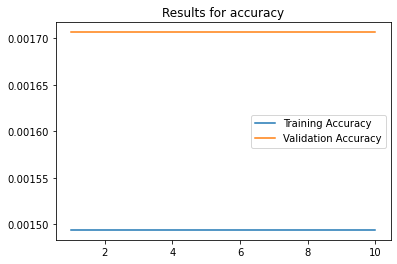

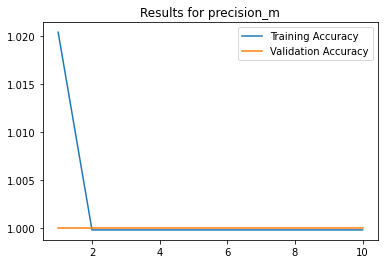

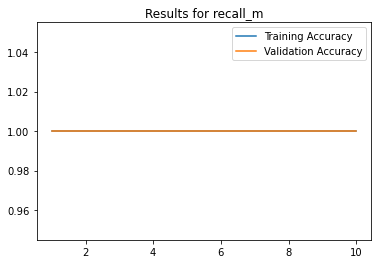

In [46]:
# Plot the evaluation metrics by each epoch for the model to see if we are over or underfitting
for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()
    

The gap between training and validation accuracy is a clear indication of overfitting. The larger the gap, the higher the overfitting.

### Word 2 Vec

In [48]:
# WORD 2 VECTOR
# Load pretrained word vectors using gensim
import gensim.downloader as api

In [49]:
# fitting the model on the training dataset
w2v_model = gensim.models.Word2Vec(X_train)


In [50]:
w2v_model.wv.most_similar('nice')

[('come', 0.9993582963943481),
 ('affordable', 0.9993305802345276),
 ('ordered', 0.9992981553077698),
 ('smooth', 0.9992828965187073),
 ('still', 0.9992782473564148),
 ('price', 0.9992520809173584),
 ('quality', 0.9992382526397705),
 ('fan', 0.9992089867591858),
 ('definitely', 0.999190628528595),
 ('range', 0.9991781115531921)]

In [51]:
w2v_model.wv.most_similar('perfect')

[('pigmented', 0.9981012940406799),
 ('blendable', 0.9980036616325378),
 ('look', 0.9979307651519775),
 ('contouring', 0.9977949857711792),
 ('face', 0.9976053237915039),
 ('give', 0.9975975155830383),
 ('super', 0.9975805282592773),
 ('concealer', 0.9974962472915649),
 ('work', 0.9971751570701599),
 ('highlighter', 0.9971458911895752)]

### Logistic Regression

In [52]:
# importing the libraries to perform the Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix



In [55]:
# changing the  train and test to fit in the model 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train.astype('U'))

X_test = vectorizer.transform(X_test.astype('U'))



In [56]:
# fitting the model
lr = LogisticRegression()

lr.fit(X_train, y_train)




LogisticRegression()

In [57]:
# printitn gthe result
y_pred = lr.predict(X_test)

y_pred

array([7, 7, 7, ..., 7, 7, 7])

In [58]:
# printing the accuracy Score
acc_test_lr = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {acc_test_lr}')

Test Accuracy: 0.9257679180887372


In [69]:
# printing the classification report
lr = classification_report(y_test, y_pred)
print(lr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         1
           7       0.93      1.00      0.96      1078
           8       1.00      0.25      0.40        28
           9       0.00      0.00      0.00         7

    accuracy                           0.93      1172
   macro avg       0.21      0.14      0.15      1172
weighted avg       0.87      0.93      0.89      1172



## accuracy score : 92.5%

## Sentiment Analysis

In [61]:
#Finding Sentiments by Review
!pip install -U textblob

In [62]:
from textblob import TextBlob

In [63]:
df


,brand_name,review_clean_lemmatized
0,9,"[worth, buying, 50g, oneworks, claim, could, see, difference, first, day, use, olay, cleanser, b..."
1,9,"[best, cream, start, ur, dayit, claim, best, thing, smoothens, ur, skin, n, make, soft, liked]"
2,9,"[perfect, summer, dry, wintersi, using, product, month, perfect, combination, n, oily, skin, non..."
3,9,"[moisturizeri, oily, skin, whip, act, great, base, primer, smoothens, skin, moisturise, skin, sk..."
4,9,"[averageits, good, please, refresh, try, product]"
...,...,...
5853,1,"[amazing, conditionergreat, conditioner, nice, smell, make, hair, silky, smooth, hair, feel, sof..."
5854,1,"[awesome, producti, received, today, use, trust, wonderful, chemically, treated, hair, work, great]"
5855,1,"[aromathe, aroma, really, amazing, hair, feeling, soft, frizz, almost, gone]"
5856,1,"[dandruffused, shampoo, severe, hairfall, dandruff]"


In [64]:

df['review_clean_lemmatized'] = df.review_clean_lemmatized.map(lambda x: '  '.join(x))
df

,brand_name,review_clean_lemmatized
0,9,worth buying 50g oneworks claim could see difference first day use olay cleanser be...
1,9,best cream start ur dayit claim best thing smoothens ur skin n make soft liked
2,9,perfect summer dry wintersi using product month perfect combination n oily skin non ...
3,9,moisturizeri oily skin whip act great base primer smoothens skin moisturise skin ski...
4,9,averageits good please refresh try product
...,...,...
5853,1,amazing conditionergreat conditioner nice smell make hair silky smooth hair feel soft...
5854,1,awesome producti received today use trust wonderful chemically treated hair work great
5855,1,aromathe aroma really amazing hair feeling soft frizz almost gone
5856,1,dandruffused shampoo severe hairfall dandruff


In [65]:
 #Summarizing Sentiment

#Categorize Polarity into Positive, Neutral or Negative
from textblob import TextBlob

print('{:40} : {:10} : {:10}'.format("Review", "Polarity", "Subjectivity") )

for review in df["review_clean_lemmatized"]:
    #Find sentiment of a review
    sentiment = TextBlob(review)
    #Print individual sentiments
    print('{:40} :   {: 01.2f}    :   {:01.2f}'.format(review[:40]\
                , sentiment.polarity, sentiment.subjectivity) )





Review                                   : Polarity   : Subjectivity
worth  buying  50g  oneworks  claim  cou :    0.52    :   0.24
best  cream  start  ur  dayit  claim  be :    0.68    :   0.44
perfect  summer  dry  wintersi  using  p :    0.57    :   0.78
moisturizeri  oily  skin  whip  act  gre :    0.10    :   0.62
averageits  good  please  refresh  try   :    0.70    :   0.60
good  oily  skindz  product  z  best  dr :    0.31    :   0.48
time  favoritethis  cream  awesome  make :    0.35    :   0.56
good  product  instantly  perfect  skin  :    0.85    :   0.80
good  eye  cream  combothis  eye  cream  :    0.37    :   0.48
olay3in1  benifits  help  reduces  dark  :   -0.15    :   0.40
must  tryamazing  combo  olay  absolutel :    0.30    :   0.10
fabulousawesome                          :    0.00    :   0.00
horrible  creamdoes  nothing  increase   :   -1.00    :   1.00
creamyi  love  scented  cream  il  give  :    0.55    :   0.75
olay  ahasuits  perfect  thing  trust  b :    1.0

creamycolour  good  wont  stay  long  cr :    0.32    :   0.55
pretty  colorpretty  color  would  suit  :    0.58    :   0.85
creamy  matt  finishcreamy  matt  finish :    0.87    :   0.97
awesomereally  nice  collection  nykaalo :    0.80    :   1.00
cool  guy  slightest  nude  medium  fair :    0.38    :   0.66
lipstickthis  ia  new  fav               :    0.14    :   0.45
loved  shadelove  pigment  formula  shad :    0.77    :   0.90
kaleing  softly  absolute  gorgoeousthis :    0.35    :   0.68
croc  worldthis  lip  shade  adorable  g :   -0.10    :   0.83
nimbu  pani  perfect  nudethis  shade  s :    0.33    :   0.63
shade  masabait  attractive  packaging   :    0.50    :   0.93
nice  productnice  lipshade              :    0.60    :   1.00
amazing  shadethis  best  lipstick  ive  :    0.77    :   0.60
beautiful  colourlove  shade  smooth     :    0.62    :   0.75
worth  buyingthis  lipstick  beautiful   :    0.59    :   0.59
awesome  nudeperfect  nude  shade  skin  :    1.00    :

nimbu  pani  refreshinglight  weight  ef :    0.58    :   0.75
beautiful  wild  orangey  ï  ½ï  ½ï  col :    0.60    :   0.80
cutelove  packaging  color  cuteï  ½ï  ½ :    0.00    :   0.00
nimbu  paniexcellent  ï  ½ï              :    0.00    :   0.00
excellentdeep  red  shade  little  velve :   -0.09    :   0.25
ýýýrawrvery  good  light  shadeï  ½      :    0.55    :   0.65
love  love  loveafter  looking  lot  rev :    0.24    :   0.56
beutiful  shade  every  skin  shadefirst :    0.77    :   0.90
love  itbest  lip  color  skin  tone  li :    0.50    :   0.55
lovelovelove  lipsticki  sold  lipstick  :    0.08    :   0.32
buzz  killthe  shade  prettyï  ½ï  ½ï  ½ :    0.00    :   0.00
joke  itï  ½ï  ½ï  ½ï  ½i  little  skept :    0.08    :   0.61
amazingit  super  soft  mate  smooth  fi :    0.31    :   0.46
kaleing  softlyvery  satisfied  shade  i :    0.50    :   1.00
beautiful  lipstickjust  shown  picture  :    0.65    :   0.79
awesomeproduct  quality  good  colour  a :    0.80    :

naughty  nudethis  shade  perfect  pinki :    0.43    :   0.73
gorgeous  pretty  shade  nykaaquite  sim :    0.32    :   0.77
cuteokay  little  disappointed  size  it :    0.12    :   0.69
goodgood  great  color                   :    0.80    :   0.75
45m  dirty  peachvery  nice  quality  th :    0.07    :   0.67
2nd  purchasedgood                       :    0.00    :   0.00
good  ï  ½ïformula  good  small  ï  ½ï   :    0.38    :   0.53
30  regal  rubygood  texture             :    0.00    :   0.00
love  itvery  easy  apply  thick  fuller :    0.28    :   0.60
good  subtle  officelooknot  dark  depen :    0.15    :   0.54
cinnamon  crunchloved  itfor  natural  y :    0.13    :   0.47
amazingthis  shade  loving  suit  alot   :    0.30    :   0.72
love  shade  must  buy                   :    0.50    :   0.60
ýýýýnykaa  matte  mini  lipstickbeautifu :    0.00    :   0.00
ýýýýnykaa  matte  mini  lipsticklovely   :    0.00    :   0.00
goodmatte  much  small  quantity  size   :   -0.25    :

must  havegood  quality  need  fill  eye :    0.00    :   0.00
eyebrow  mascara  sirius  brownvery  nic :    0.60    :   1.00
goodnice  use  donï  ½ï  ½ï  ½ï  ½ï  ½ï  :    0.00    :   0.00
love  productlife  already  complex  ï   :    0.10    :   0.50
go  itnice  product  amazing  result  ey :    0.60    :   0.90
best  buyguys  confused  buy  buy  give  :    0.30    :   0.66
fantasticfirst  time  using  product  pl :    0.37    :   0.66
win  winso  first  time  purchasing  pro :    0.50    :   0.56
best  eye  brow  mascara  eversuch  grt  :    0.75    :   0.45
amazing  eyebrow  mascarasuper  soft  fi :    0.16    :   0.49
good  eyebrow  mascarait  good  brow  ma :    0.34    :   0.55
good  daily  useperfect  daily  use  clg :    0.07    :   0.22
best  wonderful  beginner  friendlyone   :    0.62    :   0.39
amazing  productonce  use  product  brow :    0.35    :   0.65
love  ï  ½ï  ½absolutely  love  product  :    0.47    :   0.63
handy  producti  love  bushy  eyebrow  c :    0.37    :

worth  moneyabsolutely  love  product  t :    0.45    :   0.58
love  ï  ½ïits  give  natural  finish  e :    0.34    :   0.61
sirius  brownitz  good  u  hve  thick  e :    0.37    :   0.56
finally  itï  ½ï  ½ï  ½ï  ½ï  ½ï  ½ï  ½ï :    0.20    :   1.00
instagram  godget  feathery  looking  br :    0.26    :   0.52
bestbest  product  nykaa  love           :    0.50    :   0.60
loved  itthe  color  intense  staying  p :    0.25    :   0.83
oh  brow  like  way  look  brow  would   :    0.45    :   0.57
good  producta  useful  product          :    0.50    :   0.30
become  cult  favwow  really  impressed  :    1.00    :   1.00
easy  applyits  easy  apply  busy  sched :    0.32    :   0.66
miraclei  using  many  eyebrow  product  :    0.51    :   0.69
goodjust  quick  swish  flick  youre  go :    0.52    :   0.55
perfect  product  thin  eyebrowsit  give :    0.53    :   0.66
love  itthis  really  good  someone  alr :    0.72    :   0.70
itï  ½ï  ½ï  ½ï  ½ï  ½ï  ½ïits  amazing  :    0.27    :

smallits  small  much  price  ï  ½ï  ½ï  :   -0.02    :   0.30
lovelynice  mini  version  nykaa  skin   :    0.00    :   0.00
superbthis  good  quality  foundation  g :    0.70    :   0.60
hot  honeyamazing  foundation  lightweig :    0.31    :   0.68
vanillalightweight  foundation  great  e :    0.30    :   0.68
foundationgood  one  try                 :    0.00    :   0.00
foundationgood  one  liked               :    0.60    :   0.80
great  ideathankyou  nykaa  best  idea   :    0.70    :   0.35
bestgreat  see  mini  product  available :    0.05    :   0.22
nice  oneso  good  really  like  one  go :    0.54    :   0.63
awesomeits  lightweight  suit  skin  ton :    0.70    :   0.80
total  waste  moneythe  quality  literal :    0.17    :   0.45
amazingthis  first  foundation  perfect  :    0.51    :   0.66
vanilla  02love  foundation  light  waig :    0.25    :   0.55
tiny  compacta  nice  tiny  size  fit  u :    0.28    :   0.58
matte  foundationalways  use  lakme  fou :    0.34    :

highlighting  fanthe  product  carefully :    0.48    :   0.80
brushit  used  highlight  bristle  soft  :    0.35    :   0.57
awesomesoft  bristle  hursh  skin  fully :    0.50    :   1.00
awesome  highlighter  brushamazing  powd :    1.00    :   1.00
fan  brushthis  brush  smooth            :    0.40    :   0.50
good  onenykaa  brush  good  beginner  p :    0.55    :   0.73
awsmnice  product                        :    0.00    :   0.00
brushits  beautiful  ï  ½ï  ½ï  ½ï  ½ï   :    0.85    :   1.00
super  awesomethe  brush  smooth  easy   :    0.52    :   0.79
work  wellperfect  highlighting  spread  :    0.00    :   0.00
nykaa  blendpro  highlighting  fan  make :    0.53    :   0.67
excellentworked  gr8  softwill  bye  oth :    0.00    :   0.00
great  productits  great  product  highl :    0.80    :   0.75
soft  cuteits  beautiful  fan  brush  so :    0.44    :   0.62
soft  fun  useblends  properly  look  gr :    0.30    :   0.35
awsomeits  soft  perfect  go             :    0.55    :

superbï  ½ïit  moisturizingloved         :    0.00    :   0.00
good  productvery  good  product  moistu :    0.70    :   0.60
amazingthis  smell  feel  good  lip  rea :    0.47    :   0.60
lovelywhen  u  apply  lip  becomes  sine :    0.20    :   0.50
good  lip  balmi  loved  lip  balm  keep :    0.55    :   0.59
moisturisingitï  ½ï  ½ï  ½ï  ½ï  ½ï  ½ï  :    0.70    :   0.60
absolutely  love  lip  balmthe  lip  bal :    0.13    :   0.53
moisturising  lip  balmthis  moisturizes :    0.00    :   0.07
lip  balmyluv  product  delivery  also   :    0.00    :   0.00
ýýýýýýýýýýýýýýýýýývery  fragrance  moist :    0.00    :   0.00
best  lip  moisturizerhave  used  lot  l :    1.00    :   0.47
loved  itmakes  lip  soft  smooth        :    0.40    :   0.55
highy  recommend  itname                 :    0.00    :   0.00
favoritethis  range  favourite  lip  bal :    0.60    :   0.60
moisturizinggo  smooth  formula          :    0.40    :   0.50
moisturisingit  work  chapped  lip  jn   :    0.70    :

excellent  productits  fragrance  niceit :    0.46    :   0.62
nicenice                                 :    0.00    :   0.00
good  productvery  nice                  :    0.65    :   0.80
nyka  serial  kisser  lip  balmstays  lo :    0.32    :   0.50
happy  afnice                            :    0.80    :   1.00
niceserves  purpose  decently  priced  s :    0.37    :   0.57
nykaaa  serial  kisser  lip  balmitï  ½ï :    0.85    :   1.00
worth  itthis  personal  favorite  lip   :    0.33    :   0.50
nykaa  serial  kisser  lip  balm  grapei :    0.25    :   0.65
nicegood  lip  balmstays  2hrsgot  disco :    0.20    :   0.20
cuteexactly  smell  like  blueberry  eas :    0.16    :   0.59
love  ittried  first  time  awesomeï  ½ï :    0.38    :   0.47
moisturisingsmells  nice  feel  great  r :    0.70    :   0.88
goodtoo  creamy  shiny  nice  pomegranat :    0.60    :   1.00
lip  balmvery  nyc  balmgives  soft  lip :    0.10    :   0.35
moisturizing  hydratinggood  lib  balm   :    0.00    :

smell  goodit  lightweight  little  oily :    0.03    :   0.38
raspberryï  ½ï  ½i  using  since  3  wee :    0.36    :   0.49
amazingas  expected  nykaa  product  usu :    0.30    :   0.65
nice  balmi  one  people  super  picky   :    0.30    :   0.69
hydratingthe  best  part  lip  balm  con :    0.47    :   0.50
fruity  smelllovely  fruity  smell  keep :    0.20    :   0.47
perfectlightweight  ï  ½ï  ½ï  ½ï  ½ï  ½ :    0.00    :   0.00
perfectit  perfect  lip  needed  great   :    0.77    :   0.78
good  productmoisturising  lip  balm  wo :    0.50    :   0.35
awesome  productawesome  lip  balm  give :    0.85    :   0.80
fantasticthis  product  good  doesnt  ap :    0.70    :   0.60
smell  goodlong  moisture  smell  good   :    0.45    :   0.45
love  itthis  creamiest  lip  balm  ever :    0.40    :   0.62
amazingit  smell  good  love  lip  balm  :    0.60    :   0.60
good  smell  long  lastingit  soothing   :    0.44    :   0.72
goodso  good  hydrate  lip               :    0.70    :

badthe  contour  bad  highlighter  good  :    0.00    :   0.63
best  contouri  really  wanted  contour  :    0.55    :   0.45
great  productgreat  product  looking  c :    0.20    :   0.45
amazing  producthighlighter  contour  go :    0.67    :   0.77
best  begginersi  begginer  would  sugge :    0.40    :   0.63
flaky  formulation  smooth  applies  wel :    0.18    :   0.45
obsessedbest  product  must  buy  go  do :    0.00    :   0.00
thankui  love  product                   :    0.50    :   0.60
okayokay                                 :    0.00    :   0.00
amazingcontour  shade  natural  pigmente :    0.17    :   0.30
beginner  friendlybest  duo  beginner  e :    0.10    :   0.40
nice  productthis  first  contour  palet :    0.37    :   0.53
great  contour  highlighter  highlight   :    0.54    :   0.68
recommendsmooth  texture  highlight  nat :    0.10    :   0.40
gooda  bit  glittery  great  product     :    0.80    :   0.75
good  onethis  product  good  non  stick :    0.67    :

color  nice  lil  priceygood  product  d :    0.42    :   0.62
great  liner  really  pigmented  colouri :    0.46    :   0.62
03  enchanting  forestthis  quite  dark  :    0.15    :   0.52
bts  fan  girl  shadefor  bts  fan  army :    1.00    :   1.00
goodits  darker  shade  assh  shade  lig :   -0.15    :   0.40
wow  productlong  lasting  eyeliner      :    0.05    :   0.50
give  best  wingits  brush  really  soft :    0.51    :   0.49
little  darkas  claim  product  smudge   :    0.17    :   0.65
formula  nicenice  texture  look  like   :   -0.17    :   0.43
pointthe  eyeliner  smudge  proof  color :    0.21    :   0.62
goodcolour  sky  blue  kind  long  lasti :    0.14    :   0.35
good  product  happygot  155rs  worth  s :    0.50    :   0.35
loved  productfirstly  got  r  209  sale :    0.18    :   0.68
color  06unique  color  quick  dry  wate :    0.13    :   0.55
turquoise  bluelooks  best  along  black :    0.42    :   0.37
amazingi  like  colour  long  lasting    :   -0.03    :

long  lastingthis  waterproof  exactly   :    0.10    :   0.33
satisfiedi  love  colour  long  lasting  :    0.15    :   0.33
color  lastingcolor  mindblowing  last   :    0.40    :   0.19
love  productabsolutely  love  colour  s :    0.32    :   0.53
wonderful  brown  colouri  really  like  :    0.37    :   0.52
loved  itbeautiful  color  enhances  loo :    0.70    :   0.80
interesting  color  affordable  pricea   :    0.75    :   0.75
using  liner  last  yearits  waterproof  :    0.50    :   0.29
boldvery  different  brand  beautiful    :    0.42    :   0.80
loved  itlovely  brown  shade  smooth  a :    0.55    :   0.65
dragon  heartthis  one  show  different  :   -0.17    :   0.55
chaotic  calypsogifted  bestie  good  co :    0.70    :   0.60
niceits  good  liner  party  beautiful   :    0.46    :   0.62
good  productthis  amazing  eye  liner   :    0.31    :   0.47
green  eyelineramazing  product  stay  l :   -0.12    :   0.35
whimsical  potionthese  eyeliner  life   :    0.22    :

super  blendableunlike  stick  foundatio :    0.08    :   0.63
versatile  pigmentedi  bought  two  shad :    0.48    :   0.74
best  stick  foundation  everjust  recen :    0.40    :   0.52
must  haveyou  need  stick  make0up  bag :    0.00    :   0.00
goodgood                                 :    0.00    :   0.00
holy  grail  product  nykaai  ordered  n :    0.41    :   0.52
amazingi  bought  natural  bluff  tone   :    0.40    :   0.57
awesomeits  really  awesome  smooth  tex :    0.75    :   0.88
add  carti  guess  title  say  beautiful :    0.78    :   0.85
absolute  favoritei  skeptical  using  k :    0.22    :   0.67
love  product  suit  skin  welllove  nyk :    0.51    :   0.70
awesome  producti  received  parcel  yes :    0.54    :   0.72
best  product  ï  ½ï  ½ï  ½ï  ½ï  ½ï  ½ï :    0.28    :   0.50
easy  blendit  bendable  product  colour :    0.68    :   0.86
beauty  extract  youtube  channelawesome :    0.00    :   0.00
great  producti  pleasantly  surprised   :    0.45    :

best  kindso  le  product  used  blend   :    1.00    :   0.30
work  contour  toothe  creamy  consisten :    0.72    :   0.92
good  contouring  good  stick  right  fo :    0.50    :   0.50
good  blend  goodits  good  product      :    0.70    :   0.60
nykaa  skin  genius  foundationamazing   :    0.15    :   0.33
beautiful  applicationits  nice  product :    0.71    :   0.85
greatbought  darker  shade  used  contou :    0.15    :   0.47
excellenta  good  quality  product  blen :    0.85    :   0.80
easy  use  within  budgetthis  product   :    0.50    :   0.61
stick  foundationthis  amazing  blend  r :    0.40    :   0.55
conceals  careabsolutely  love  coverage :    0.31    :   0.61
foundation  sticki  loved  texture       :    0.70    :   0.80
contourthis  first  ever  contour  stick :    0.39    :   0.73
bestestvery  good  foundation  smooth  a :    0.58    :   0.62
nice  blendit  blend  well  skin  got  n :    0.60    :   1.00
nice  producti  love  tat  product  stay :    0.32    :

7i  love  stick  used  contouring  pigme :    0.60    :   0.60
niceeits  bigger  look  picture  ordered :    0.50    :   0.70
amazingthis  product  perfct  shade  con :    0.00    :   0.00
awesome  productvery  niceawesome  cover :    0.70    :   0.85
natural  buffnot  good  blend  properly  :    0.30    :   0.34
ýýýýýýnykaa  skingenius  foundation  sti :    0.00    :   0.00
good  contour  stickhad  eye  long  time :    0.22    :   0.67
blend  able  creamynice  contour  dusky  :    0.50    :   0.62
amazingas  expected  concealer  stick  a :    0.35    :   0.58
excellentthis  1010                      :    0.00    :   0.00
goodvery  easy  blend  good  contour  sh :    0.57    :   0.72
creamy  blend  like  dreamrefer  picture :    0.50    :   0.60
wowits  blend  beautifullylove           :    0.00    :   0.00
flawless  finishit  blend  easily  look  :    0.56    :   0.71
toffee  chiselbought  contouring         :    0.00    :   0.00
amazing  productthis  third  refill  rea :    0.22    :

goodi  always  use  easy  apply  stay  w :    0.22    :   0.64
best  one  everi  always  love  nykaa  p :    0.53    :   0.59
goodcreating  winged  look  become  easy :    0.43    :   0.83
best  eye  artistthis  best  eye  artist :    0.39    :   0.39
eyelinervery  nice  useworth  purchasing :    0.60    :   1.00
nykaa  get  winged  sketch  eyeliner  ep :    0.31    :   0.66
application  goodits  super  black  supe :    0.39    :   0.73
gel  eyelinergives  perfect  winged  eye :    1.00    :   1.00
great  productlove  eyeliner  easy  use  :    0.54    :   0.86
black  swanthe  tip  eyeliner  make  soo :    0.17    :   0.49
great  place  start  beginner  perfectio :    0.15    :   0.56
go  itso  far  like  itz  bit  tricky  u :    0.27    :   0.92
superb  eyelinerthis  eyeliner  super  b :    0.34    :   0.69
perfectperfect  wing  dark  black  color :   -0.16    :   0.42
saysamazing  product  impressed  quality :    0.54    :   0.69
best  buyit  incredible  heavily  pigmen :    0.46    :

awesome  tipi  really  liked  tip  liner :    0.58    :   0.75
average  productthe  formula  eyeliner   :    0.22    :   0.50
average  producteyeliner  average  mark  :    0.07    :   0.43
goodthe  tip  get  dry  easily  hurt  ap :    0.18    :   0.72
amazing  productamazing  product  used   :    0.65    :   0.85
jet  blackgood  applicator  pigmentation :    0.60    :   0.55
smudge  easilygot  good  wing  good  pra :    0.51    :   0.55
waterproofthe  description  say  smudgep :    0.43    :   0.83
goodits  smart  woman  dont  want  waste :    0.34    :   0.55
absolute  wasteplease  donï  ½ï  ½ï  ½ï  :    0.00    :   0.45
smoothits  smooth  easy  apply  dry  qui :    0.27    :   0.58
beautiful  linermade  liner  application :    0.51    :   0.77
perfectthe  brush  stand  product  help  :    0.25    :   0.54
nykaa  get  winged  perfect  eyeliner  p :    0.68    :   0.70
goodthis  good  product  nykaa  must  tr :    0.70    :   0.60
black  swanits  average  eyeliner  two   :    0.23    :

long  lastingive  using  1  year  produc :    0.39    :   0.54
worth  itnot  feeling  cakey  true  colo :    0.32    :   0.38
goodbest  compact  dry  skin  blend  eas :    0.44    :   0.61
good  productrose  beige  match  prefect :    0.47    :   0.50
awesomethis  third  time  purchased  mak :    0.40    :   0.38
one  besti  dont  know  many  time  orde :    0.75    :   0.40
perfectuse  matte  base  foundation  bes :    0.29    :   0.67
nice  compacti  purchased  rose  beige   :    0.49    :   0.77
goodvery  soft  light  product  confused :    0.24    :   0.61
favoritepurchased  third  time  honestly :    0.29    :   0.66
give  natural  lookawesome  product  nyk :    0.57    :   0.55
time  favoritethis  favorite  powder  al :    0.50    :   1.00
nice  productperfect  product  one  need :    0.17    :   0.78
perfect  super  smooth  light  weight  n :    0.34    :   0.48
love  compactthis  shade  absolutely  su :    0.48    :   0.58
goodgood  one  shade  chose  little  dar :    0.41    :

medium  acne  prone  skinvery  light  po :    0.49    :   0.68
toasty  tannot  clear  right  shade  too :    0.08    :   0.44
go  compactthis  2nd  purchase  compact  :    0.07    :   0.41
matte  finishjust  wow                   :    0.10    :   1.00
toasty  tan  05its  ok  product  make  s :    0.50    :   0.50
ok  typeok  type  good  like  full  cove :    0.52    :   0.55
unsatisfactory  waysfirslty  show  dirty :   -0.04    :   0.70
matte  power  compactthe  shade  perfect :    0.85    :   0.90
le  hydratingas  say  hydrating  compact :    0.03    :   0.30
packing  goodreceived  well  within  tim :    0.00    :   0.00
seemed  bit  darker  shadethis  compact  :    0.60    :   0.74
silkysilkiest  compact  everevery  compa :    0.25    :   0.63
perfect  medium  dusky  skintoneone  bes :    0.76    :   0.66
best  productthe  best  product  ever  u :    0.90    :   0.47
perfect  compactas  name  suggested  rea :    0.24    :   0.40
nicedoesnt  make  skin  look  cakey      :    0.00    :

perfect  setthis  setting  powder  dupe  :    0.33    :   0.47
amazing  productit  cakey  love  formula :    0.57    :   0.77
one  word  amazing  ï  ½ï  ½ï  ½high  en :    0.53    :   0.77
cant  resistthese  product  like  katrin :    0.33    :   0.65
lovedawesome  little  hard  blend  bt  p :    0.16    :   0.61
best  conditioner  evermakes  dry  hair  :    0.41    :   0.52
conditionerit  good  conditionerit  make :    0.68    :   0.73
goodconditioner  good  give  healthy  sh :    0.60    :   0.67
silky  smooth  hairthe  product  amazing :    0.25    :   0.42
natural  conditioner  make  hair  silky  :    0.03    :   0.38
amazing  conditionergreat  conditioner   :    0.50    :   0.70
awesome  producti  received  today  use  :    0.93    :   0.92
aromathe  aroma  really  amazing  hair   :    0.35    :   0.62
dandruffused  shampoo  severe  hairfall  :    0.00    :   0.00
goodit  irritating  bad  dont  like  muc :   -0.30    :   0.56


In [66]:
labels = ["Negative", "Neutral", "Positive"]
#Initialize count array
values =[0,0,0]

In [67]:
#Categorize each review
for review in df["review_clean_lemmatized"]:
    sentiment = TextBlob(review)
    
#Custom formula to convert polarity 
# 0 = (Negative) 1 = (Neutral) 2=(Positive)
polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
    
#add the summary array
values[polarity] = values[polarity] + 1
    
print("Final summarized counts :", values)


Final summarized counts : [0, 0, 1]



 Pie Representation 
-------------------


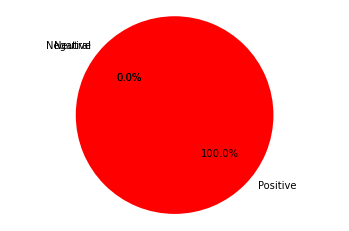

In [68]:
import matplotlib.pyplot as plt
#Set colors by label
colors=["Green","Blue","Red"]

print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

### 0% negative 100% positive